# Regressão linear simples

## Importação das bibliotecas

In [41]:
# Importação das bibliotecas, sklearn para criar o modelo de regressão e yellowbrick para visualização de residuais

# import pandas as pd
from pandas import read_csv

# import numpy as np
from numpy import corrcoef

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Warning 
from yellowbrick.regressor import ResidualsPlot 

## Carregando dado

In [14]:
base = read_csv('cars.csv')
base.head()

,Unnamed: 0,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16


Como podemos ver, temos uma coluna a mais indesejada. Para tirá-la, usamos o método ```drop```, inserindo no argumento ```columns``` a coluna que desejamos excluir. Por exemplo, ```columns = 'coluna 1' ```. Caso tenhamos mais de uma coluna, é só colocar em forma de lista de strings, por exemplo: ```columns = ['peso', 'altura']```

In [35]:
base = base.drop(columns = 'Unnamed: 0')
base.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


## Cálculo da correlação

No nosso caso, x será a distância e y a velocidade. A função que calcula a correlação é o ```corrcoef``` do numpy. Ela pode receber até DataFrame como argumento, mas é preferível usar arrays. Por conta disso, usamos o método ```to_numpy()``` para fazer a conversão.

Só para reforçar que ```base['dist']``` NÃO está no formato de array, veja que

In [55]:
x = base['dist']
type(x)

pandas.core.series.Series

enquanto que 

In [57]:
X = base['dist'].to_numpy()
y = base['speed'].to_numpy()

type(X)

numpy.ndarray

Deste modo, calculando a correlação, temos

In [58]:
correlacao = corrcoef(X, y)
correlacao

array([[1.       , 0.8068949],
       [0.8068949, 1.       ]])

## Fazendo a regressão linear

In [59]:
#formato de matriz com uma coluna a mais
X = X.reshape(-1, 1) 
# Criação do modelo e treinamento (fit indica que o treinamento deve ser executado)
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

In [60]:
# Visualização dos coeficientes
modelo.intercept_

8.283905641787175

In [61]:
#inclinacao
modelo.coef_

array([0.16556757])

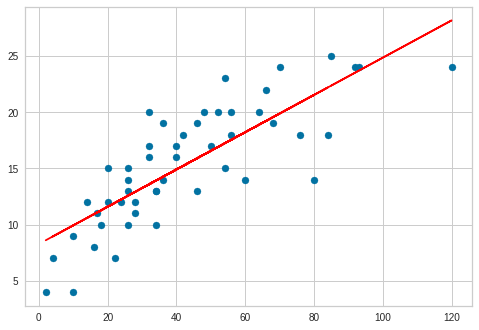

In [62]:
# Geração do gráfico com os pontos reais e as previsões
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color = 'red')

In [63]:
# Previsão da "distância 22 pés" usando a fórmula manual
# interceptação * inclinação * valor de dist
#Qual velocidade se levou 22 pés pra parar?
modelo.intercept_ + modelo.coef_ * 22

array([11.92639228])

In [64]:
# Previsão utilizando função do sklearn
modelo.predict([[22]])

array([11.92639228])

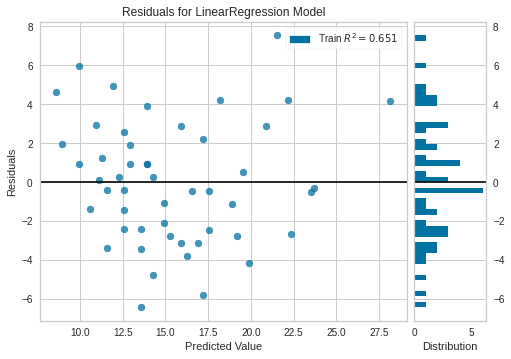

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [65]:
# Gráfico para visualizar os residuais
visualizador = ResidualsPlot(modelo)
visualizador.fit(X, y)
visualizador.poof()

# Maneira Alternativa

Poderíamos usar a função ```linregress``` do ```scipy.stats``` que obteríamos os mesmos resultados, com exceção do gráfico dos resíduos.